In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Costanti fisiche
sigma = 5.67e-8  # Costante di Stefan-Boltzmann (W/m²/K⁴)
S0 = 1361  # Costante solare (W/m²)
albedo = 0.3  # Albedo terrestre
epsilon = 0.92 # Emissività degli strati atmosferici
N = 3  # Numero di strati atmosferici
H_max = 15_000  # Altezza massima dell'atmosfera (15 km)

# Vettore quota (N strati equidistanti tra 0 e 15 km)
altitude = np.linspace(0, H_max, N)

# Flusso di energia solare incidente sulla superficie terrestre (diviso 4 per la geometria terrestre)
F_in = (1 - albedo) * S0 / 4


In [82]:
# Inizializzazione delle temperature (stima iniziale)
T_surf = (F_in / sigma) ** 0.25  # Temperatura della superficie terrestre senza atmosfera
T_layers = np.full(N, T_surf - 10)  # Strati più freddi della superficie inizialmente


In [83]:
T_surf

254.58234278554602

In [84]:
T_layers

array([244.58234279, 244.58234279, 244.58234279])

In [85]:
# Iterazione per trovare l'equilibrio termico
for _ in range(1000):  # Iteriamo per stabilizzare il sistema
    # Radiazione emessa dalla superficie
    F_surface = sigma * T_surf**4

    # Radiazione emessa dagli strati atmosferici
    F_atmos = sigma * T_layers**4

    # Aggiornamento della temperatura degli strati atmosferici
    for i in range(N):
        if i == 0:
            # Lo strato più basso riceve energia dalla superficie e dallo strato superiore
            F_absorbed = epsilon * (F_surface + F_atmos[i + 1] if N > 1 else 0) / 2
        elif i == N - 1:
            # Lo strato più alto riceve energia solo dallo strato inferiore
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            # Strati intermedi ricevono energia dagli strati sopra e sotto
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        T_layers[i] = (F_absorbed / sigma) ** 0.25

    # Aggiornamento della temperatura della superficie
    T_surf = ((F_in + epsilon * F_atmos[0]) / sigma) ** 0.25

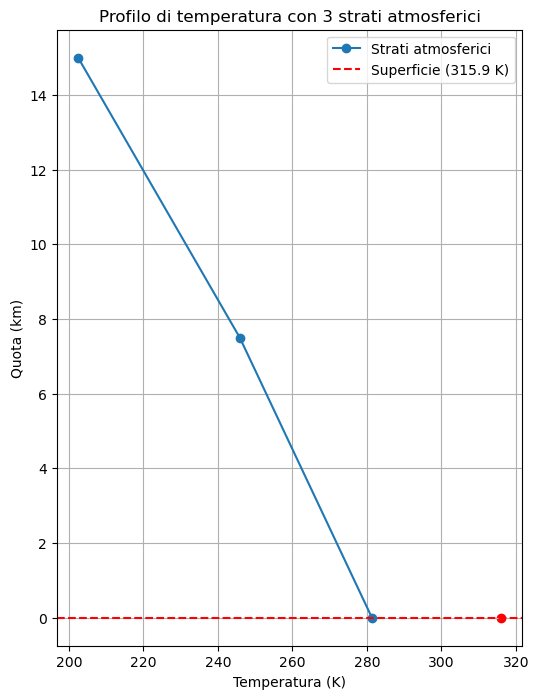

In [86]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(T_layers, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf, 0, color='red')

plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()

In [87]:
# Costanti fisiche
sigma = 5.67e-8  # Costante di Stefan-Boltzmann (W/m²/K⁴)
S0 = 1361  # Costante solare (W/m²)
albedo = 0.3  # Albedo terrestre
epsilon = 0.92 # Emissività degli strati atmosferici
N = 3  # Numero di strati atmosferici
H_max = 15_000  # Altezza massima dell'atmosfera (15 km)

# Vettore quota (N strati equidistanti tra 0 e 15 km)
altitude = np.linspace(0, H_max, N)

# Flusso di energia solare incidente sulla superficie terrestre (diviso 4 per la geometria terrestre)
F_in = (1 - albedo) * S0 / 4




# Gradiente adiabatico secco (K/m)
g = 9.81  # m/s², accelerazione di gravità
cp = 1004  # J/(kg·K), calore specifico dell'aria secca
Gamma_d = g / cp  # K/m
Gamma_d_secca = 9.8  # Gradiente adiabatica secca (°C/km)
Gamma_d_umida = 6.0  # Gradiente adiabatica umida (°C/km)


# Limite massimo del gradiente di temperatura
max_gradient = 10  # Limite massimo del gradiente in °C/km



# Temperatura di equilibrio della superficie (Stefan-Boltzmann)
T_surf_conv = (F_in / sigma) ** 0.25

# Inizializziamo la temperatura per ogni strato
T_layers_conv = np.zeros(N)
T_layers_conv[0] = T_surf  # Temperatura al suolo


In [88]:

# Iterazione per trovare l'equilibrio termico
for _ in range(100):  # Iteriamo per stabilizzare il sistema
    # Radiazione emessa dalla superficie
    F_surface = sigma * T_surf_conv**4

    # Radiazione emessa dagli strati atmosferici
    F_atmos = sigma * T_layers_conv**4

    # Aggiornamento della temperatura degli strati atmosferici
    for i in range(N):
        if i == 0:
            # Lo strato più basso riceve energia dalla superficie e dallo strato superiore
            F_absorbed = epsilon * (F_surface + F_atmos[i + 1] if N > 1 else 0) / 2
        elif i == N - 1:
            # Lo strato più alto riceve energia solo dallo strato inferiore
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            # Strati intermedi ricevono energia dagli strati sopra e sotto
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        # Temperatura radiativa
        T_layers_conv[i] = (F_absorbed / sigma) ** 0.25

        
        #CORREZIONE MINIMO
        # Calcolo del gradiente adiabatica variabile in base all'altitudine
        if i > 0:
            # Puoi calcolare il gradiente adiabatica in base alla temperatura media o all'umidità
            # Per esempio, ipotizzando un valore di gradiente che cambia in base all'altitudine
            if T_layers_conv[i] > 273:  # Se la temperatura è sopra lo zero, usa il gradiente secco
                Gamma_d = Gamma_d_secca
            else:  # Altrimenti, usa il gradiente umido
                Gamma_d = Gamma_d_umida

            # Calcoliamo la temperatura adiabatica (Temperatura che lo strato dovrebbe avere seguendo il gradiente adiabatico secco o umido)
            T_adiabatic = T_layers_conv[i-1] - Gamma_d * (altitude[i] - altitude[i-1]) / 1000  # Diviso per 1000 per km->m
            # Correggiamo la temperatura in base al gradiente adiabatica (se il nostro conto il gradiente è troppo elevato, assegna quello della legge adiabatica)
            T_layers_conv[i] = min(T_layers_conv[i], T_adiabatic)

        # CORREZIOPNE MASSIMO    
        # Limite massimo per il gradiente di temperatura tra gli strati
        if i > 0:
            # Calcoliamo il gradiente di temperatura tra due strati consecutivi
            gradient = (T_layers_conv[i] - T_layers_conv[i-1]) / (altitude[i] - altitude[i-1])
            # Se il gradiente supera il limite massimo, correggiamo la temperatura
            if gradient > max_gradient / 1000:  # 10 C/km --> 0.01 K/m
                T_layers_conv[i] = T_layers_conv[i-1] + max_gradient / 1000 * (altitude[i] - altitude[i-1])

    # Aggiornamento della temperatura della superficie
    F_atmos[0] = sigma * T_layers_conv[0]**4  # Radiazione emessa dal primo strato
    T_surf_conv = ((F_in + epsilon * F_atmos[0]) / sigma) ** 0.25

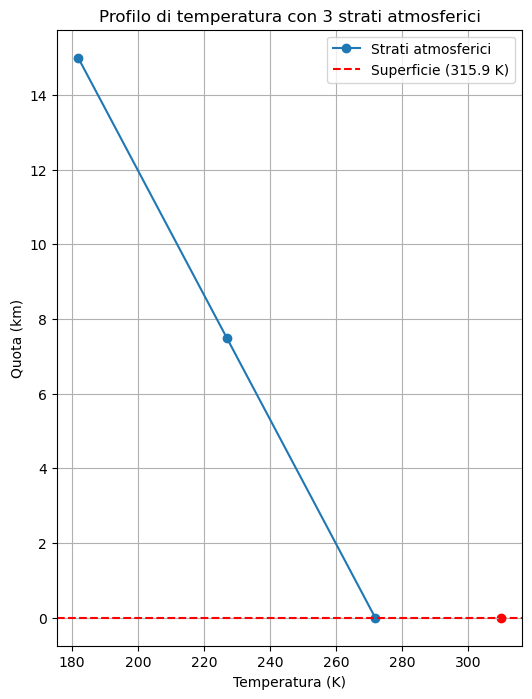

In [89]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(T_layers_conv, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf_conv, 0, color='red')


plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()

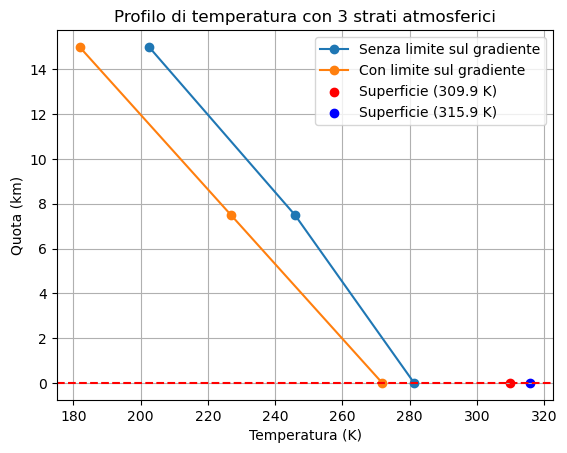

In [90]:
import matplotlib.pyplot as plt

# Supponiamo che T_layers_no_constraint e T_layers_with_constraint siano già calcolati

# Plot del profilo di temperatura senza constraint
plt.plot(T_layers, altitude / 1000, marker='o', label='Senza limite sul gradiente')

# Plot del profilo di temperatura con constraint
plt.plot(T_layers_conv, altitude / 1000, marker='o', label='Con limite sul gradiente')

# Aggiungi una linea orizzontale per la temperatura della superficie
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(T_surf_conv, 0, color='red', label=f'Superficie ({T_surf_conv:.1f} K)')
plt.scatter(T_surf, 0, color='blue', label=f'Superficie ({T_surf:.1f} K)')

# Etichette e titolo
plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()

# Mostra il plot